# Linear Discriminant Analysis (LDA) Demo

**NOTE**: Recall that LDA is used when the observed/input data comes from a Gaussian/normal distribution, each class each variable falls into has its own specific mean, and a shared variance across all classes.

Plotting idea based on [documentation](https://scikit-learn.org/0.16/auto_examples/classification/plot_classifier_comparison.html#example-classification-plot-classifier-comparison-py).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Create Datasets

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

# Create dummy datasets where number of variables/features/predictors is p=2
x, y = make_classification(
    n_features=2, 
    n_redundant=0, 
    n_informative=2, 
    random_state=1, 
    n_clusters_per_class=1
)

x += 2*np.random.uniform(size=x.shape)
linearly_separable = (x, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable
]

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

mesh_step = 0.2
i = 2
ds = datasets[i]
x, y = ds

In [4]:
# Split current dataset into training and test sets
x = StandardScaler().fit_transform(x) # set mean=0 and set var=1 for input values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4)

x_min, x_max = x_test[:, 0].min() - .5, x_test[:, 0].max() + .5
y_min, y_max = x_test[:, 1].min() - .5, x_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step), np.arange(y_min, y_max, mesh_step))

[]

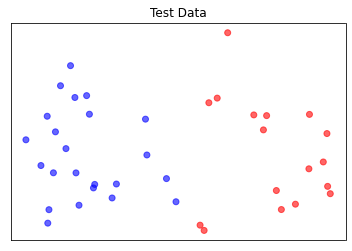

In [5]:
from matplotlib.colors import ListedColormap

# Plot test data first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, ax = plt.subplots()
ax.scatter(
    x_test[:, 0], 
    x_test[:, 1], 
    c=y_test, 
    cmap=cm_bright, 
    alpha=0.6
)
ax.set_title('Test Data')
ax.set_xticks(())
ax.set_yticks(())

## Train LDA Classifier

In [6]:
classifier = LDA()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)
score

1.0

## Plot LDA Decision Boundary

In [7]:
if hasattr(classifier, "decision_function"):
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

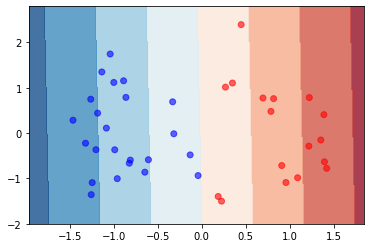

In [8]:
# Put the result into a color plot
fig, ax = plt.subplots()

Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(
    x_test[:, 0], 
    x_test[:, 1], 
    c=y_test, 
    cmap=cm_bright, 
    alpha=0.6
)